In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import Binarizer, Imputer, \
    OneHotEncoder, PolynomialFeatures, StandardScaler, \
    MinMaxScaler, RobustScaler

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.cross_validation import cross_val_score, cross_val_predict
from sklearn import metrics


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


# Import the Data

Import the data found in `datasets/inventory_by_county.csv`. This data comes from [realtor.com](https://research.realtor.com/data/inventory-trends/) and details housing information about the most active counties for housing stock in the US. 

After you import the data and run the following cell to create a "state" identifier: 
- take out the `Median Listing Price` as your target column.
- use `train_test_split()` with a test size of `0.33` to create a training and test set for the features and your target column (`Median Listing Price`). You should have four objects at this point.
- identify the number of rows and columns in all four of datasets (`train_x, train_y, test_x, test_y`)

In [3]:
df = pd.read_csv('datasets/inventory_by_county.csv')

# The last line of the csv contains extra information for the reader but not valid data
# We will remove that line and use the .copy() method
# To create a copy of the DataFrame itself
# Instead of referring to a slice or a mask of the original dataframe

df = df.iloc[0:1000, :].copy()
df.head()

,Month,CountyFIPS,CountyName,Nielsen Rank,Footnote,Median Listing Price,Median Listing Price M/M,Median Listing Price Y/Y,Active Listing Count,Active Listing Count M/M,...,Pending Listing Count Y/Y,Avg Listing Price,Avg Listing Price M/M,Avg Listing Price Y/Y,Total Listing Count,Total Listing Count M/M,Total Listing Count Y/Y,Pending Ratio,Pending Ratio M/M,Pending Ratio Y/Y
0,2017-09-01,6037.0,"Los Angeles, CA",1.0,NaN,649900.0,-0.0002,0.0398,16464.0,-0.0261,...,-0.2008,1377900.0,-0.0035,0.1149,19577.0,-0.0306,-0.1578,0.1891,-0.0055,-0.0122
1,2017-09-01,17031.0,"Cook, IL",2.0,NaN,277000.0,-0.0072,0.0897,26510.0,-0.0142,...,-0.2012,428900.0,-0.0046,0.0701,29420.0,-0.0202,-0.0683,0.1098,-0.0067,-0.0207
2,2017-09-01,48201.0,"Harris, TX",3.0,NaN,299000.0,0.0007,-0.0355,15472.0,-0.1020,...,-0.0535,446900.0,0.0182,-0.0225,21676.0,-0.0888,0.0114,0.4010,0.0204,-0.0397
3,2017-09-01,4013.0,"Maricopa, AZ",4.0,NaN,329500.0,0.0015,0.0444,18421.0,0.0013,...,-0.2857,515200.0,0.0043,0.0658,18426.0,0.0013,-0.0860,0.0003,0.0000,-0.0001
4,2017-09-01,6073.0,"San Diego, CA",5.0,NaN,660200.0,-0.0139,0.0541,6057.0,-0.0205,...,0.1176,1147100.0,-0.0126,0.0615,6076.0,-0.0224,-0.1880,0.0031,-0.0019,0.0009


In [4]:
# continue here to extract Median Listing Price and to split the data using train_test_split()
mlp = df[['Median Listing Price']].values
print('shape:\n', mlp.shape, '\n',
     '1st 5 rows:\n', mlp[0:5, :])

shape:
 (1000, 1) 
 1st 5 rows:
 [[ 649900.]
 [ 277000.]
 [ 299000.]
 [ 329500.]
 [ 660200.]]


In [12]:
X_train, X_test, y_train, y_test = train_test_split(df, mlp, test_size=0.33)
print('X_train: ', X_train.shape,'\n', 'X_test: ', X_test.shape,
      '\n', 'y_train: ', y_train.shape, '\n', 'y_test: ', y_test.shape)

X_train:  (670, 35) 
 X_test:  (330, 35) 
 y_train:  (670, 1) 
 y_test:  (330, 1)


# Question 1

Investigate the pattern of missing values in the dataset. What do you think should be done with those missing values? Is it appropriate to use `Imputer` to address any missing rows? Why or why not?

In [13]:
# Convert this cell to markdown and write your answer here.
df.isnull().sum()[df.isnull().sum() > 0]

Footnote                     862
Price Increase Count M/M     181
Price Increase Count Y/Y     188
Pending Listing Count M/M    198
Pending Listing Count Y/Y    212
dtype: int64

In [14]:
df[['Footnote']].isnull().sum()
'''based on what's seen in this column, there are about 862 null values for 'Footnote' but the rest are '*' values 
so it would probably be best to ignore this column for our analysis '''

"based on what's seen in this column, there are about 862 null values for 'Footnote' but the rest are '*' values \nso it would probably be best to ignore this column for our analysis "

In [15]:
df[['Price Increase Count M/M']].tail(100)
df[['Price Increase Count Y/Y']].tail(100)
df[['Pending Listing Count M/M']].tail(100)
df[['Pending Listing Count Y/Y']].tail(25)

# the rest of the columns have numerical values so it would be good to impute values for these not just 'Footnote'.

,Pending Listing Count Y/Y
975,-0.4677
976,0.6250
977,0.0991
978,88.0000
979,-0.1129
980,1.6364
981,NaN
982,NaN
983,-1.0000
984,-0.0678


# Question 2

Use the `Active Listing Count ` feature and the `Binarizer` preprocessing object to create a dummy variable coded 1 if the count of active listings is above 10,000 units. Store the transformed data from the training set in a variable called `training_active_listing_dummy`

In [16]:
df.columns.values

array(['Month', 'CountyFIPS', 'CountyName', 'Nielsen Rank', 'Footnote',
       'Median Listing Price', 'Median Listing Price M/M',
       'Median Listing Price Y/Y', 'Active Listing Count ',
       'Active Listing Count M/M', 'Active Listing Count Y/Y',
       'Days on Market ', 'Days on Market M/M', 'Days on Market Y/Y',
       'New Listing Count ', 'New Listing Count M/M',
       'New Listing Count Y/Y', 'Price Increase Count ',
       'Price Increase Count M/M', 'Price Increase Count Y/Y',
       'Price Decrease Count ', 'Price Decrease Count M/M',
       'Price Decrease Count Y/Y', 'Pending Listing Count ',
       'Pending Listing Count M/M', 'Pending Listing Count Y/Y',
       'Avg Listing Price', 'Avg Listing Price M/M',
       'Avg Listing Price Y/Y', 'Total Listing Count',
       'Total Listing Count M/M', 'Total Listing Count Y/Y',
       'Pending Ratio', 'Pending Ratio M/M', 'Pending Ratio Y/Y'], dtype=object)

In [17]:
active_listing_count_binarizer = Binarizer(10000)
active_listing_count_binarizer.fit(X_train[['Active Listing Count ']].values)
training_active_listing_dummy = active_listing_count_binarizer.transform(
    X_train[['Active Listing Count ']].values)
print(training_active_listing_dummy[0:5], training_active_listing_dummy.mean())

[[ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]] 0.00597014925373


# Question 3

The Pending Ratio of a county is the proportion of houses that are under contract to be sold, but have not been finalized yet. Your boss believes that the best way to model this is by including both the ratio and the $\text{ratio}^2$ -- this would let us investigate a non-linear relationship. 

Use `PolynomialFeatures` to create a pending ratio and a $\text{pending ratio}^2$ term. Do not include an intercept term. Save this 2-dimensional array in a variable called `training_pending_ratio`

In [23]:
df[['Pending Ratio']].head()

,Pending Ratio
0,0.1891
1,0.1098
2,0.4010
3,0.0003
4,0.0031


In [29]:
pf_poly = PolynomialFeatures(2, include_bias=False)
pf = X_train[['Pending Ratio']].values
pf_poly.fit(pf)

training_pending_ratio = pf_poly.transform(pf)
print(training_pending_ratio[0:5, :], training_pending_ratio.mean())

print('Polynomial mean: ', training_pending_ratio.mean())

[[ 0.          0.        ]
 [ 0.5671      0.32160241]
 [ 0.1373      0.01885129]
 [ 0.          0.        ]
 [ 0.0293      0.00085849]] 0.118734679276
Polynomial mean:  0.118734679276


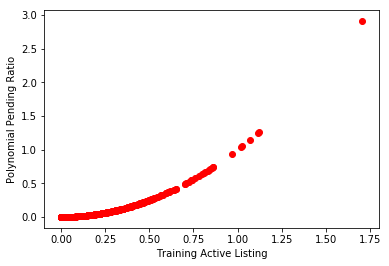

In [39]:
import matplotlib.pyplot as plt
%matplotlib inline


plt.scatter(training_pending_ratio[:, 0], training_pending_ratio[:, 1], color='r')
plt.xlabel('Training Active Listing')
plt.ylabel('Polynomial Pending Ratio')

# Question 4

Join the variables you have transformed in numpy. They should be the following:

- `training_active_listing_dummy`
- `training_pending_ratio`

What is the shape of the new numpy array?

In [35]:
c_array = np.concatenate([training_active_listing_dummy, training_pending_ratio], axis=1)
print(c_array.shape)
print(c_array[0:5, :])

(670, 3)
[[ 0.          0.          0.        ]
 [ 0.          0.5671      0.32160241]
 [ 0.          0.1373      0.01885129]
 [ 0.          0.          0.        ]
 [ 0.          0.0293      0.00085849]]


# Question 5

Instantiate a `LinearRegression` object and fit a model using the new training array above and the training target column you created when you imported the data. What is the $R^2$ score using the training data?

In [47]:
lr = LinearRegression()

x = c_array
y = y_train

model = lr.fit(x, y)
print(lr.coef_)
print('R^2: ', lr.score(x,y))

[[  85811.52663265  -13827.18007755  238603.13690541]]
R^2:  0.071811725422


# Question 6

Using the fit objects that you created in questions 2, 3, and 4, do the following:

1. Transform the holdout (test) data that you created when you imported the data
2. Use numpy to join the transformed holdout (test) data. 
3. Score your fit `LinearRegression` object using the new holdout data. What happens to your $R^2$ value?

In [55]:
# test data

test_active_listing_dummy = active_listing_count_binarizer.transform(X_test[['Active Listing Count ']].values)
print('test active listing dummy: ', test_active_listing_dummy[0:5], test_active_listing_dummy.mean())

test_pending_ratio_dummy = pf_poly.transform(X_test[['Pending Ratio']].values)
print('test pending ratio dummy: ', '\n', test_pending_ratio_dummy[0:5])
print(test_active_listing_dummy.shape)

test active listing dummy:  [[ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]] 0.0121212121212
test pending ratio dummy:  
 [[  1.10000000e-03   1.21000000e-06]
 [  2.44600000e-01   5.98291600e-02]
 [  3.49300000e-01   1.22010490e-01]
 [  2.38000000e-02   5.66440000e-04]
 [  3.98000000e-02   1.58404000e-03]]
(330, 1)


In [54]:
#2
test_array = np.concatenate([test_active_listing_dummy, test_pending_ratio_dummy], axis=1)
print(test_array.shape)

(330, 3)


In [57]:
#3
lr.score(test_array, y_test)
# the R^2 was lower on the test data compared to the training data

0.065702137802345906

# Bonus: Question 7

This question will require external research!

Import `StandardScaler` and answer the following questions:

1. Scale the training data and refit the linear regression. Does your $R^2$ change? Why or why not?
2. Compare the coefficients in your linear regression between the standardized and the unstandardized versions. What is the difference? How do you interpret the coefficients in each case?
3. Standardize your test data and look at the $R^2$ score between the standardized and unstandardized versions of your model. Is there a difference? Why or why not?

In [58]:
ss = StandardScaler()

In [59]:
active_pending_ratio = X_train[['Active Listing Count ', 'Pending Ratio']].values
ss.fit(active_pending_ratio)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [62]:
active_pending_ratio_list = ss.transform(active_pending_ratio)
print(active_pending_ratio_list[0:5])

[[-0.43809301 -0.72929921]
 [-0.39688031  1.82465118]
 [ 0.26417133 -0.1109649 ]
 [ 0.0905285  -0.72929921]
 [-0.55403806 -0.59734586]]


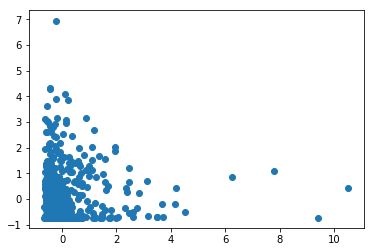

In [63]:
plt.scatter(active_pending_ratio_list[:,0], active_pending_ratio_list[:, 1])

In [64]:
lm = LinearRegression()
model = lm.fit(active_pending_ratio_list, y_train)

In [68]:
mscore = model.score(active_pending_ratio_list, y_train)

In [75]:
print('model score with Standard Scalar: ', '\n', mscore)
print('model coefficient with Standard Scalar: ', model.coef_)

model score with Standard Scalar:  
 0.124858879853
model coefficient with Standard Scalar:  [[ 44180.43125469  35775.98180139]]


In [81]:
lm2 = LinearRegression()
model2 = lm2.fit(active_pending_ratio, y_train)
mscore2 = model.score(active_pending_ratio, y_train)

print('model score unstandard: ', mscore2)
print('model coeff unstandard: ', model2.coef_)

model score unstandard:  -359508.603711
model coeff unstandard:  [[  2.42772623e+01   1.61118115e+05]]


In [82]:
active_list_pending_ratio_test = X_test[['Active Listing Count ', 'Pending Ratio']].values

ss.fit(active_list_pending_ratio_test)
active_list_pending_ratio_test_transform = ss.transform(active_list_pending_ratio_test)
print(active_list_pending_ratio_test_transform[0:5, :])

[[ 0.66831156 -0.73678412]
 [-0.34644756  0.42836104]
 [ 0.66556153  0.92934953]
 [-0.37211445 -0.62816484]
 [-0.40740644 -0.55160499]]


In [83]:
lr3 = LinearRegression()
model3 = lr3.fit(active_list_pending_ratio_test_transform, y_test)
model3_score = model3.score(active_list_pending_ratio_test_transform, y_test)

print('model score with SS Test set: ', model3_score)
print('model coeff with SS test set: ', model3.coef_)

model score with SS Test set:  0.0745516975671
model coeff with SS test set:  [[ 27363.4081528   28426.15611674]]


In [84]:
lr4 = LinearRegression()
model4 = lr4.fit(active_list_pending_ratio_test, y_test)
model4_score = model4.score(active_list_pending_ratio_test, y_test)

print('model score with US Test set: ', model4_score)
print('model coeff with US test set: ', model4.coef_)

model score with US Test set:  0.0745516975671
model coeff with US test set:  [[  1.25416747e+01   1.36018883e+05]]


# Bonus: Question 8

This question is open-ended!

1. Use the remaining columns in the data. Use different features and transformations to create a model with the highest $R^2$ **in the training set** that you can. Compare the differences in feature extraction, etc. using cross-validation (`cross_val_score` or `KFolds`). Do not worry about using the preprocessing library at this point.
2. Apply these same transformations to the test dataset. How does the model score now?
3. Once you are satisfied with your model, refactor your code where appropriate to use sklearn preprocessing libraries. 